## ForestLAS - a method for estimating number of canopy strata from LiDAR data.
### Phil Wilkes <a href=mailto:p.wilkes@ucl.ac.uk>p.wilkes@ucl.ac.uk</a>
Wilkes, P., Jones, S.D., Suarez, L., Haywood, A., Mellor, A., Woodgate, W., Soto-Berelov, M., Skidmore, A.K., 2016. Using discrete-return ALS to quantify number of canopy strata across diverse forest types. <i>Methods Ecol. Evol.</i> 7(6) pp.700-712. <a href=http://dx.doi.org/10.1111/2041-210X.12510>doi.org/10.1111/2041-210X.12510</a> 

This notebook introduces the ForestLAS package, which was developed to analyse LiDAR data in a pure Python workflow. This tutorial runs through some basic functioanlity of ForestLAS, importing and exporting .las files etc., then looks at creating canopy height profiles at the plot scale before finally applying this to a larger area.
* requires lastools if using compressed .laz files

In [1]:
# required for demonstration
%pylab
%matplotlib inline
%load_ext autoreload
import os

# Change "path" to point at the unzipped directory 
path = "/Users/phil/Google_Drive/RMIT/CRCSI_207_ForestLAS/"
lasFiles = os.path.join(path, "LAS")
os.chdir(lasFiles)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


temporary directory at: /var/folders/3g/x_8fg5zj7lvghkk1q3xz9d380000gp/T/lidar.processing.589851.tmp
number of tiles to process: 1
0% | 0 of 4916 points processed | 2017-06-05 13:18:47.277367
5% | 245 of 4916 points processed | 2017-06-05 13:18:47.300803
10% | 490 of 4916 points processed | 2017-06-05 13:18:47.330004
15% | 735 of 4916 points processed | 2017-06-05 13:18:47.367701
20% | 980 of 4916 points processed | 2017-06-05 13:18:47.390448
25% | 1225 of 4916 points processed | 2017-06-05 13:18:47.408847
30% | 1470 of 4916 points processed | 2017-06-05 13:18:47.426124
35% | 1715 of 4916 points processed | 2017-06-05 13:18:47.443381
40% | 1960 of 4916 points processed | 2017-06-05 13:18:47.460691
45% | 2205 of 4916 points processed | 2017-06-05 13:18:47.479923
50% | 2450 of 4916 points processed | 2017-06-05 13:18:47.501229
55% | 2695 of 4916 points processed | 2017-06-05 13:18:47.530319
60% | 2940 of 4916 points processed | 2017-06-05 13:18:47.547997
65% | 3185 of 4916 points process

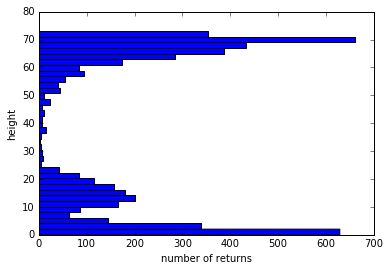

In [2]:
# import lasIO from ForestLAS
from forestlas import lasIO

# reads .las file "WC1.las" including all point metadata in verbose mode
las = lasIO.lasIO(os.path.join(lasFiles, "WC1.las"), keep_temp=True,
                  verbose=True)

# returns as an numpy array
lasAll = las.all().to_array()

# plot histogram of height
plt.hist(lasAll.z, lasAll.z.max() // 2, orientation="horizontal")
plt.ylabel("height")
plt.xlabel("number of returns")

number of plots: 16
5.0% | 245 of 4916 points selected | 2017-06-05 13:09:29.817762
10.0% | 490 of 4916 points selected | 2017-06-05 13:09:29.901648
15.0% | 735 of 4916 points selected | 2017-06-05 13:09:29.981488
19.9% | 980 of 4916 points selected | 2017-06-05 13:09:30.091914
24.9% | 1225 of 4916 points selected | 2017-06-05 13:09:30.235170
29.9% | 1470 of 4916 points selected | 2017-06-05 13:09:30.344793
34.9% | 1715 of 4916 points selected | 2017-06-05 13:09:30.396258
39.9% | 1960 of 4916 points selected | 2017-06-05 13:09:30.445633
44.9% | 2205 of 4916 points selected | 2017-06-05 13:09:30.510281
49.8% | 2450 of 4916 points selected | 2017-06-05 13:09:30.556770
54.8% | 2695 of 4916 points selected | 2017-06-05 13:09:30.602271
59.8% | 2940 of 4916 points selected | 2017-06-05 13:09:30.642333
64.8% | 3185 of 4916 points selected | 2017-06-05 13:09:30.694689
69.8% | 3430 of 4916 points selected | 2017-06-05 13:09:30.744159
74.8% | 3675 of 4916 points selected | 2017-06-05 13:09:30.78

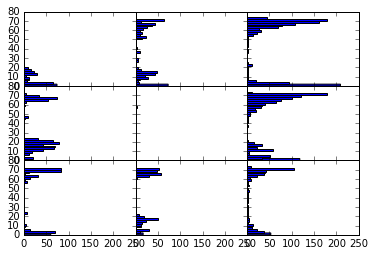

In [3]:
# data can also be tiled
# here we tile a plot into 9 subplots...
lasTiles = las.tiles(8).to_array(recarray=True)

# ...and plot histograms of height
f, a = plt.subplots(3, 3, sharex=True, sharey=True)
for i, tile in enumerate(lasTiles): 
    ax = a[i//3][i%3]
    ax.hist(tile['z'], bins=40, range=(0, 80), orientation="horizontal")
f.subplots_adjust(hspace=0, wspace=0)

5% | 245 of 4916 points processed | 2017-06-05 13:09:33.525254
10% | 490 of 4916 points processed | 2017-06-05 13:09:33.526580
15% | 735 of 4916 points processed | 2017-06-05 13:09:33.528763
20% | 980 of 4916 points processed | 2017-06-05 13:09:33.531168
25% | 1225 of 4916 points processed | 2017-06-05 13:09:33.536098
30% | 1470 of 4916 points processed | 2017-06-05 13:09:33.538393
35% | 1715 of 4916 points processed | 2017-06-05 13:09:33.542036
40% | 1960 of 4916 points processed | 2017-06-05 13:09:33.543773
45% | 2205 of 4916 points processed | 2017-06-05 13:09:33.545357
50% | 2450 of 4916 points processed | 2017-06-05 13:09:33.546990
55% | 2695 of 4916 points processed | 2017-06-05 13:09:33.548308
60% | 2940 of 4916 points processed | 2017-06-05 13:09:33.550508
65% | 3185 of 4916 points processed | 2017-06-05 13:09:33.553734
70% | 3430 of 4916 points processed | 2017-06-05 13:09:33.558308
75% | 3675 of 4916 points processed | 2017-06-05 13:09:33.560036
80% | 3920 of 4916 points proc

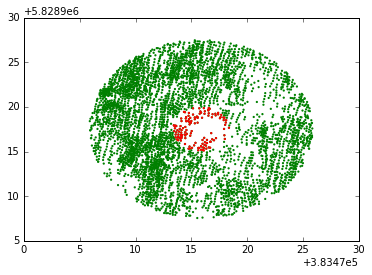

In [4]:
# data can also be extracted as a subplot
# first extract the plot centre coordinates
header = lasIO.parseHeader(os.path.join(lasFiles, "WC1.las"))
x = np.mean([header["xmin"], header["xmax"]])
y = np.mean([header["ymin"], header["ymax"]])

# then extract returns from a 5 m radius from the plot centre
# lasSubPlot = las.plot(x, y, radius=5, round=True).asArray()

lasSubPlot = las.plot(x, y, extent=5, round=True).to_array()

# and graph the complete plot and the subset
plt.scatter(lasAll['x'], lasAll['y'], marker=".",
            c="green", edgecolor="none")
plt.scatter(lasSubPlot['x'], lasSubPlot['y'], marker=".", 
            c="red", edgecolor="none")

In [5]:
# las files can be manipulated and then saved out
lasFirst = lasAll[lasAll['rtn_num'] == 1]
las.np2LAS(lasFirst, out="firstReturns.las")

# check that
print lasIO.parseHeader(os.path.join(lasFiles, "WC1.las"))["numptbyreturn"]
print lasIO.parseHeader(os.path.join(lasFiles,
                                     "firstReturns.las"))["numptbyreturn"]

.las file written to firstReturns.las
(2568, 1670, 578, 92, 7)
(2568, 0, 0, 0, 0)


In [6]:
# finally there is an option to remove all temporary files and directories,
# this can be set as an option using lasIO.lasIO(keepTemp=False)
las.removeTemp()

/var/folders/3g/x_8fg5zj7lvghkk1q3xz9d380000gp/T/lidar.processing.14111.tmp has been deleted


### Lets now create a canopy height profile

In [20]:
from forestlas import canopyComplexity as cc

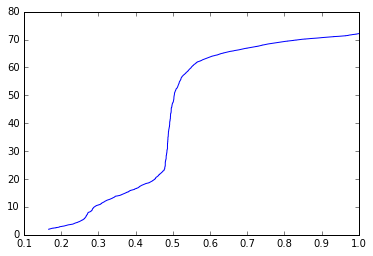

In [100]:
%autoreload 2
# canopy height profiles are created from gap probability
# canopyComplexity calls lasIO so there is no need to bring in .las files beforehand

CP = cc.CanopyComplexity().fromLAS(os.path.join(lasFiles, "WC1.las"))
chp = CP.CHP()

# lets take a look for our plot
plt.plot(chp.pgap, chp.zx)

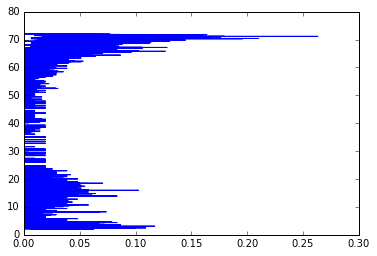

In [101]:
# if we plot the first derivative of this we see the CHP is 
# pretty noisy! Alpha is set to 0 so there is no smoothing
# applied
chp = CP.CHP(alpha=0)
plt.plot(chp.fd, chp.zx)

72.11


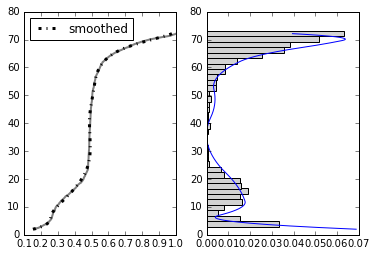

In [103]:
# through a supervised classification and cross validation an alpha
# parameter of 0.3 was identified as a suboptimal value for the 
# nonparametric spline smoothing (this is set as standard)

chp = CP.CHP() # 0.3 set as default alpha

plt.subplot(121)
plt.plot(chp.pgap, chp.zx, "-", color="grey", linewidth=2)
plt.plot(chp.ps, chp.zx, "-.", color="black", linewidth=3, label="smoothed")
plt.legend(loc=2)

plt.subplot(122)
plt.plot(chp.fd, chp.zx)
#plt.plot(freq.fd, freq.zx, "r")
h, b = np.histogram(chp.z, chp.z.max() // 2, normed=True)
plt.barh(b[1:] - 1, h * (1 - chp.pgap.min()), height=2, fc="lightgrey")
print chp.z.max()

Number of canopy layers: 3


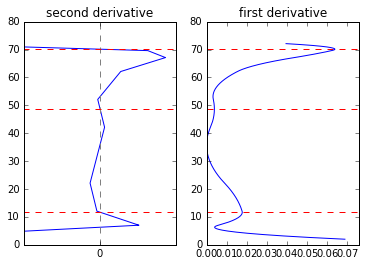

In [104]:
# from smoothed estimate of Pgap we can then take the second
# derivative to estimate the number of canopy layers

plt.subplot(121)
plt.plot(chp.sd, chp.zx)
plt.xlim(-0.01, 0.01)
plt.plot([0, 0], [0, 80], "--", color="grey")
for layer in chp.layerLocation:
    plt.plot([-1, 1], [layer, layer], "--r",)
plt.xticks([0])
plt.title("second derivative")

plt.subplot(122)
for layer in chp.layerLocation:
    plt.plot([0, 1], [layer, layer], "--r",)
plt.plot(chp.fd, chp.zx)
plt.xlim(0, chp.fd.max() * 1.1)
plt.title("first derivative")

print "Number of canopy layers:", chp.layerCount

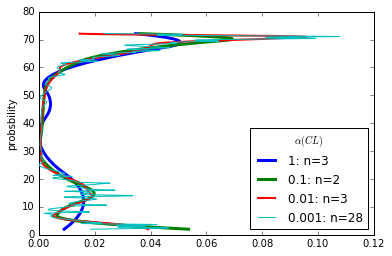

In [105]:
# 3 canopy layers may be considered an overestimtion of CL,
# one solution is to change the alpha paramter in the 
# las.canopyHeightProfile(alpha=x) call

for i, (alpha, lw) in enumerate(zip([1, 0.1, 0.01, 0.001],
                                    [3, 3, 2, 1])):
    chp = CP.CHP(alpha=alpha)
    plt.plot(chp.fd, chp.zx, linewidth=lw, 
             label="{}: n={}".format(alpha, chp.layerCount),
             zorder=i)
    
plt.legend(loc="best", title=r"$\alpha (CL)$")
plt.ylabel("height (m)")
plt.ylabel("probsbility")

In [111]:
# a more robust method is to leave alpha and instead use a bootstrap, 
# this creates N models of the point cloud where the original point
# cloud is sampled (weighted by original point cloud and with replaceemnt).
# N = 100 is recommended for complex forest, but for this example we 
# will use N=10

chps = np.array([cc.CanopyComplexity().fromLAS(CP.simulateCloud()).CHP().layerCount for _ in range(10)])
print "mean number of canopies: {:.2f}".format(chps.mean())
print "standard deviation: {:.2f}".format(chps.std())
print "as an integer:",chps.mean().astype(int)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

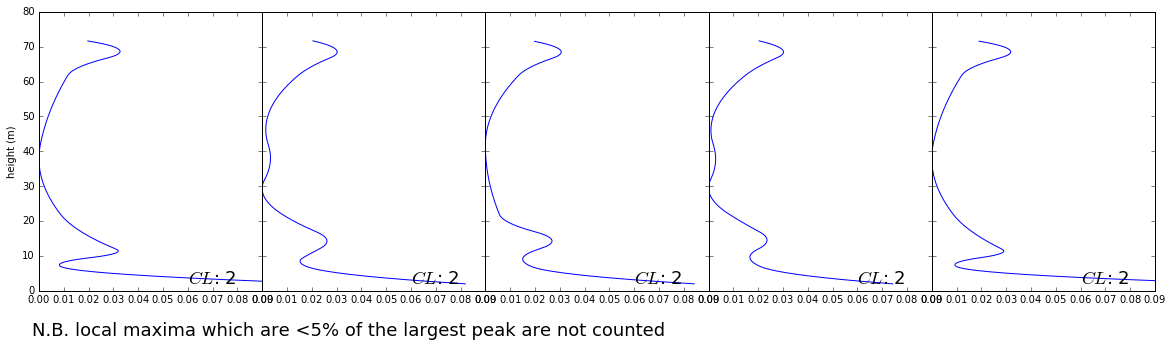

In [110]:
# From the above we can see that 
# We can take a closer look at individual iterations to see how 
# the CHP configuration changes

f, a = plt.subplots(1, 5, figsize=(20, 5), sharey=True, sharex=True)
las = cc.CanopyComplexity().fromLAS(os.path.join(lasFiles, "WC1.las")).CHP("model")

for bsi in xrange(5):
    ax = a[bsi]
    CHPi = cc.CanopyComplexity().fromLAS(CP.simulateCloud()).CHP()
    ax.plot(CHPi.fd, CHPi.zx)
    ax.text(0.06, 2, 
            "$CL$: {}".format(CHPi.layerCount),
            fontsize=18)
    if bsi == 0:    
        ax.set_ylabel("height (m)")
    ax.set_xlim(0, 0.09)
        
f.subplots_adjust(hspace=0, wspace=0)
f.text(0.12, 0, "N.B. local maxima which are <5% of the largest peak are not counted", fontsize=18)

In [114]:
# Finally we can create continous layers from ALS captured over a wider area.
# This can take a while on a desktop computer, so to illustrate the point we 
# make a canopy height and canopy height profile layer from a smaller area.

from forestlas import woodyAttribute as wa

path = "/Users/phil/Google_Drive/RMIT/CRCSI_207_ForestLAS/"
lasFiles = os.path.join(path, "LAS")
os.chdir(os.path.join(lasFiles, 'large_tile'))

# first create 20 m x 20 m tiles
lasIO.lasIO('WC45_SUB.las', out=os.getcwd()).tiles(20).to_las()

# then attribute layer
CH = wa.canopyStructure(os.path.join(lasFiles, "large_tile", "WC45_SUB_20m_TILES"), number_of_processes=4, verbose=False, layers=True, N=1)
# Output can be accessed as a dictionary of numpy arrays
Ar = CH.to_array()

# to export as a tiff requires the installation of GDAL
CH.exportTiff(os.path.join(lasFiles, "largeTileExample.tif"))

100% | 116 of 116 tiles exported | 2017-06-05 14:11:17.167613
.las file(s) written to /Users/phil/Google_Drive/RMIT/CRCSI_207_ForestLAS/LAS/large_tile/WC45_SUB_20m_TILES
Image already exists, overwrite? (Y|N): y
layers tif saved at /Users/phil/Google_Drive/RMIT/CRCSI_207_ForestLAS/LAS/largeTileExample.tif


height tif saved at /Users/phil/Google_Drive/RMIT/CRCSI_207_ForestLAS/LAS/height_20.00.tif
pgap tif saved at /Users/phil/Google_Drive/RMIT/CRCSI_207_ForestLAS/LAS/pgap_20.00.tif


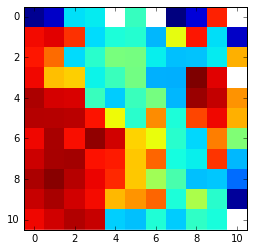

In [115]:
# Height and other metrics can be computed simultaneously (N set to 1 for quickness of computing)
height_pgap = wa.canopyStructure(os.path.join(lasFiles, "large_tile", "WC45_SUB_20m_TILES"), 
                            number_of_processes=4, height=True, pgap=True, N=1)
height_pgap.exportTiff(lasFiles)

# and plotted
plt.imshow(height_pgap.to_array()['height'], interpolation='none')